In [1]:
import pandas as pd
import numpy as np

In [144]:
df = pd.read_csv("USD_INR.csv")

In [145]:
df.head(10)

,Date,Price,Open,High,Low,Change %
0,02-Jan-80,8.00,8.00,8.00,8.00,0
1,03-Jan-80,7.95,7.95,7.95,7.95,-0.63
2,04-Jan-80,8.05,8.05,8.05,8.05,1.26
3,07-Jan-80,8.05,8.05,8.05,8.05,0
4,08-Jan-80,8.05,8.05,8.05,8.05,0
5,09-Jan-80,8.00,8.00,8.00,8.00,-0.62
6,10-Jan-80,8.00,8.00,8.00,8.00,0
7,11-Jan-80,8.03,8.03,8.03,8.03,0.37
8,14-Jan-80,8.03,8.03,8.03,8.03,0
9,15-Jan-80,7.90,7.90,7.90,7.90,-1.62


In [146]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Change %     object
dtype: object

In [147]:
df.describe()

,Price,Open,High,Low
count,10183.000000,10183.000000,10183.000000,10183.000000
mean,37.110366,37.085279,37.221301,37.007236
std,18.481833,18.472842,18.549076,18.418183
min,7.680000,7.680000,7.680000,7.680000
25%,16.950000,16.950000,16.950000,16.950000
50%,42.470000,42.420000,42.567000,42.350000
75%,47.942500,47.900000,48.046000,47.805000
max,74.340000,74.380000,74.490000,74.060000


In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%b-%y')

In [151]:
data = pd.read_csv('USD_INR.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
print(data.head())

            Price  Open  High   Low Change %
Date                                        
1980-01-02   8.00  8.00  8.00  8.00        0
1980-01-03   7.95  7.95  7.95  7.95    -0.63
1980-01-04   8.05  8.05  8.05  8.05     1.26
1980-01-07   8.05  8.05  8.05  8.05        0
1980-01-08   8.05  8.05  8.05  8.05        0


In [152]:
data.index

DatetimeIndex(['1980-01-02', '1980-01-03', '1980-01-04', '1980-01-07',
               '1980-01-08', '1980-01-09', '1980-01-10', '1980-01-11',
               '1980-01-14', '1980-01-15',
               ...
               '2019-04-07', '2019-04-08', '2019-04-09', '2019-04-10',
               '2019-04-11', '2019-04-12', '2019-04-14', '2019-04-15',
               '2019-04-16', '2019-04-17'],
              dtype='datetime64[ns]', name='Date', length=10183, freq=None)

In [161]:
ts = data['Price']
ts.head(10)


Date
1980-01-02    8.00
1980-01-03    7.95
1980-01-04    8.05
1980-01-07    8.05
1980-01-08    8.05
1980-01-09    8.00
1980-01-10    8.00
1980-01-11    8.03
1980-01-14    8.03
1980-01-15    7.90
Name: Price, dtype: float64

In [162]:
ts['1992']

Date
1992-01-01    25.806
1992-01-02    25.806
1992-01-03    25.826
1992-01-06    25.813
1992-01-07    25.830
1992-01-08    25.823
1992-01-09    25.823
1992-01-10    25.823
1992-01-13    25.850
1992-01-14    25.840
1992-01-15    25.840
1992-01-16    25.873
1992-01-17    26.032
1992-01-20    25.924
1992-01-21    25.917
1992-01-22    25.912
1992-01-23    25.927
1992-01-24    26.072
1992-01-27    25.966
1992-01-28    25.957
1992-01-29    25.940
1992-01-30    25.927
1992-01-31    26.001
1992-02-03    25.860
1992-02-04    25.826
1992-02-05    25.803
1992-02-06    25.816
1992-02-07    25.846
1992-02-10    25.833
1992-02-11    25.967
               ...  
1992-11-20    30.015
1992-11-23    29.945
1992-11-24    30.071
1992-11-25    30.039
1992-11-26    30.125
1992-11-27    30.130
1992-11-30    30.289
1992-12-01    30.349
1992-12-02    30.446
1992-12-03    30.428
1992-12-04    30.722
1992-12-07    30.722
1992-12-08    30.757
1992-12-09    30.852
1992-12-10    30.783
1992-12-11    30.807
1992-12-

In [4]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

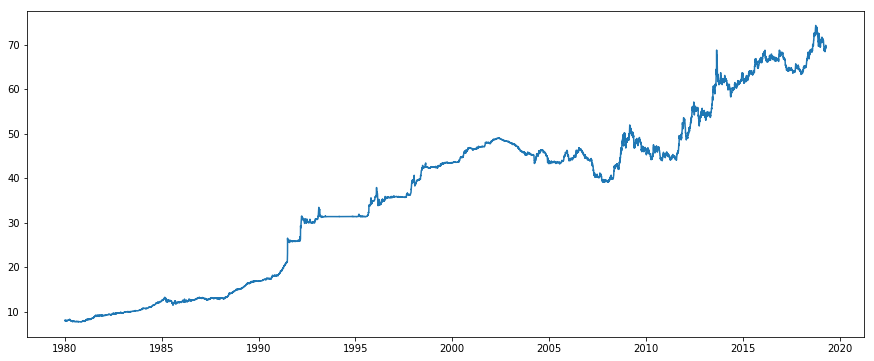

In [164]:
plt.plot(ts)

## Make Time Series Stationary

### Estimating & Eliminating Trend

In [172]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=100).mean()
    rolstd = timeseries.rolling(window=100).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

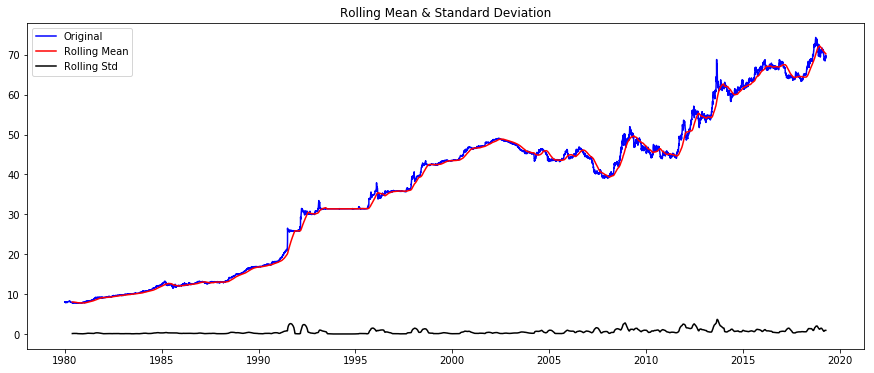

Results of Dickey-Fuller Test:
Test Statistic                    -0.236641
p-value                            0.934011
#Lags Used                        37.000000
Number of Observations Used    10145.000000
Critical Value (1%)               -3.430995
Critical Value (5%)               -2.861825
Critical Value (10%)              -2.566922
dtype: float64


In [173]:
test_stationarity(ts)

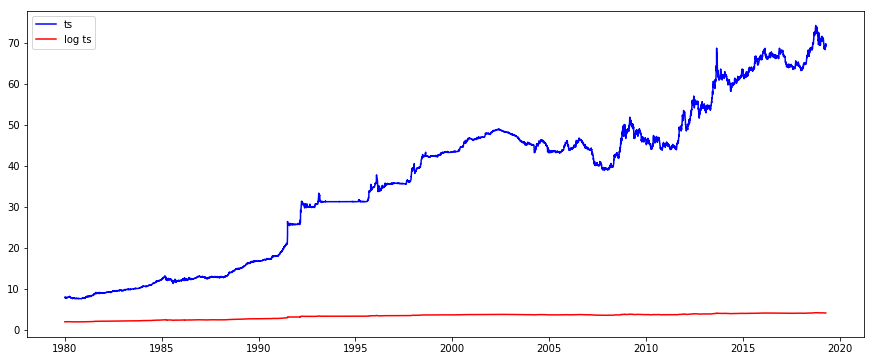

In [174]:
ts_log = np.log(ts)
plt.plot(ts, color='blue',label='ts')
plt.plot(ts_log, color='red',label='log ts')
plt.legend(loc='best')

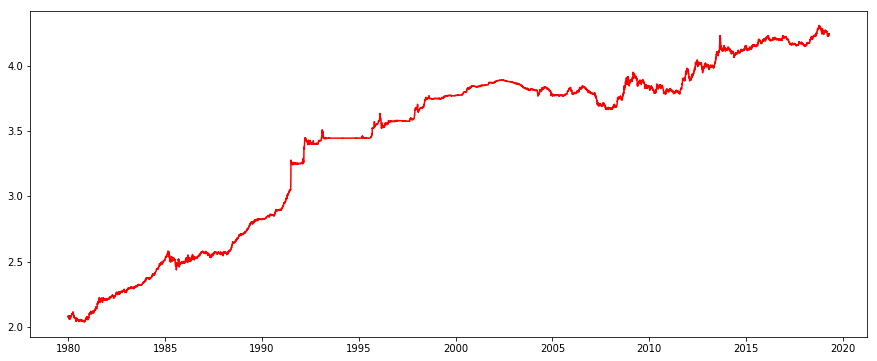

In [175]:
plt.plot(ts_log, color='red',label='log ts')

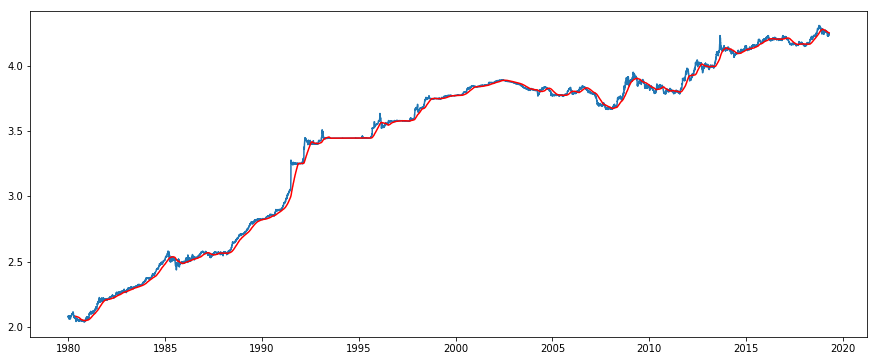

In [181]:
moving_avg = ts_log.rolling(window = 100).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [182]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(100)

Date
1980-01-02         NaN
1980-01-03         NaN
1980-01-04         NaN
1980-01-07         NaN
1980-01-08         NaN
1980-01-09         NaN
1980-01-10         NaN
1980-01-11         NaN
1980-01-14         NaN
1980-01-15         NaN
1980-01-16         NaN
1980-01-17         NaN
1980-01-18         NaN
1980-01-21         NaN
1980-01-22         NaN
1980-01-23         NaN
1980-01-24         NaN
1980-01-25         NaN
1980-01-28         NaN
1980-01-29         NaN
1980-01-30         NaN
1980-01-31         NaN
1980-02-01         NaN
1980-02-04         NaN
1980-02-05         NaN
1980-02-06         NaN
1980-02-07         NaN
1980-02-08         NaN
1980-02-11         NaN
1980-02-13         NaN
                ...   
1980-04-11         NaN
1980-04-14         NaN
1980-04-15         NaN
1980-04-16         NaN
1980-04-17         NaN
1980-04-18         NaN
1980-04-21         NaN
1980-04-22         NaN
1980-04-23         NaN
1980-04-24         NaN
1980-04-25         NaN
1980-04-28         NaN
1980-0

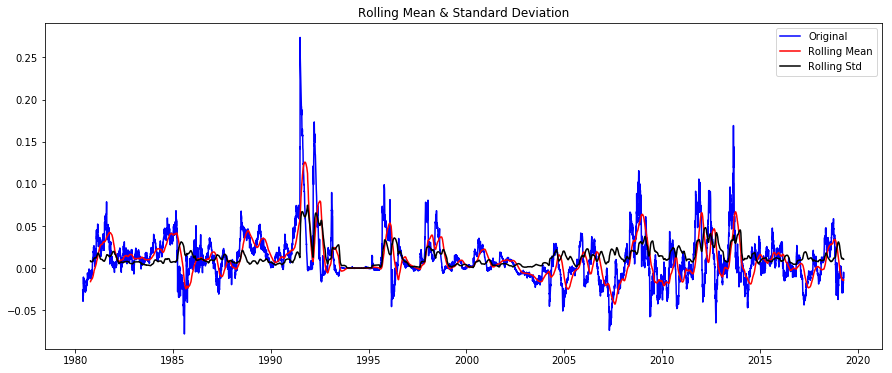

Results of Dickey-Fuller Test:
Test Statistic                -8.906974e+00
p-value                        1.130933e-14
#Lags Used                     3.400000e+01
Number of Observations Used    1.004900e+04
Critical Value (1%)           -3.431001e+00
Critical Value (5%)           -2.861828e+00
Critical Value (10%)          -2.566923e+00
dtype: float64


In [183]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [184]:
expweighted_avg = ts_log.ewm(halflife = 100).mean()

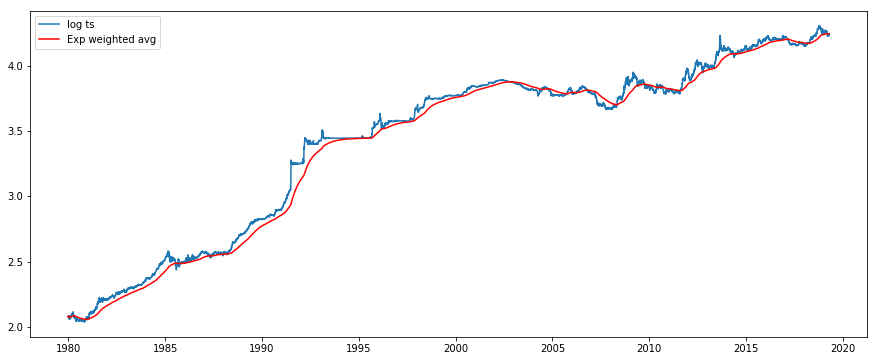

In [185]:
plt.plot(ts_log, label = "log ts")
plt.plot(expweighted_avg, color='red', label = "Exp weighted avg")
plt.legend(loc = "best")

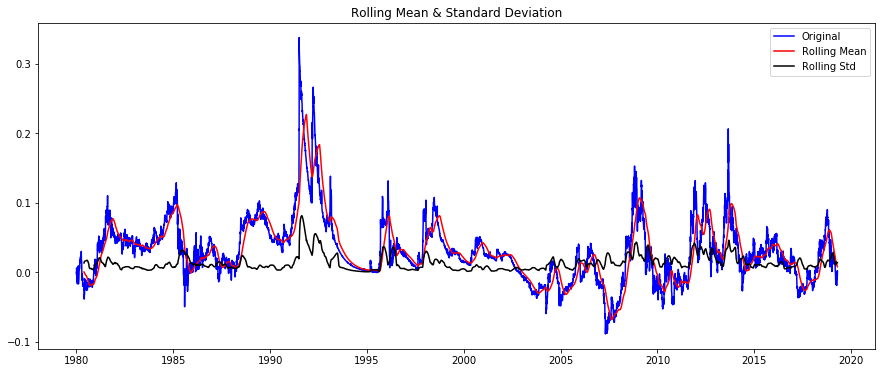

Results of Dickey-Fuller Test:
Test Statistic                    -4.823409
p-value                            0.000049
#Lags Used                        34.000000
Number of Observations Used    10148.000000
Critical Value (1%)               -3.430995
Critical Value (5%)               -2.861825
Critical Value (10%)              -2.566922
dtype: float64


In [187]:
ts_log_ewma_diff = ts_log - expweighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality

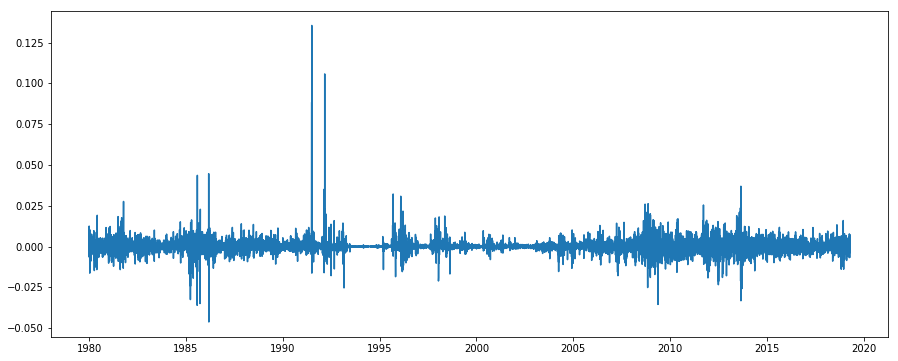

In [188]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

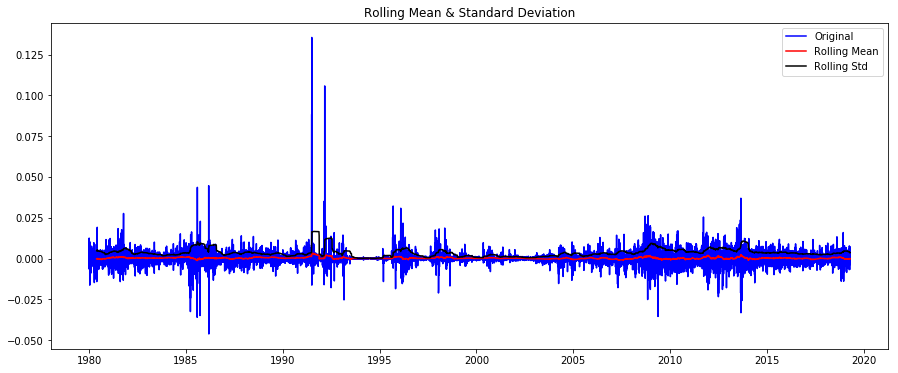

Results of Dickey-Fuller Test:
Test Statistic                -1.653267e+01
p-value                        2.016922e-29
#Lags Used                     3.300000e+01
Number of Observations Used    1.014800e+04
Critical Value (1%)           -3.430995e+00
Critical Value (5%)           -2.861825e+00
Critical Value (10%)          -2.566922e+00
dtype: float64


In [189]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

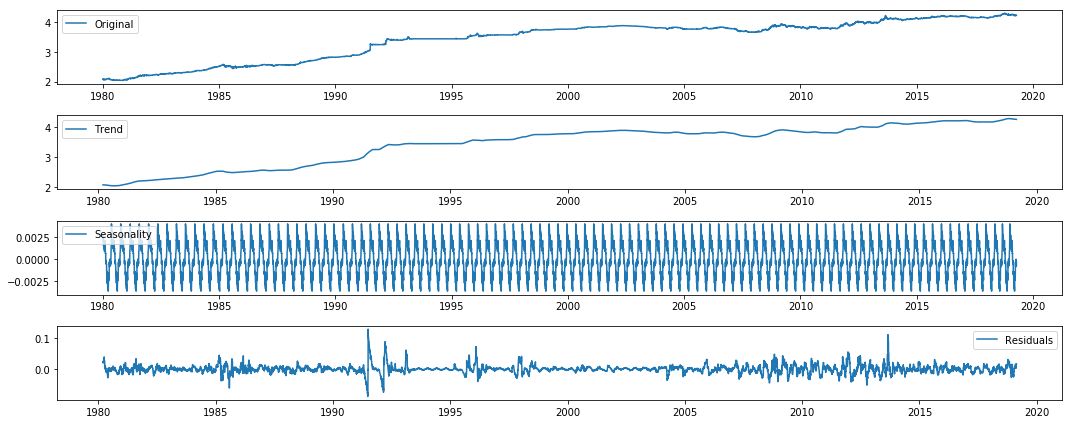

In [190]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq = 100)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

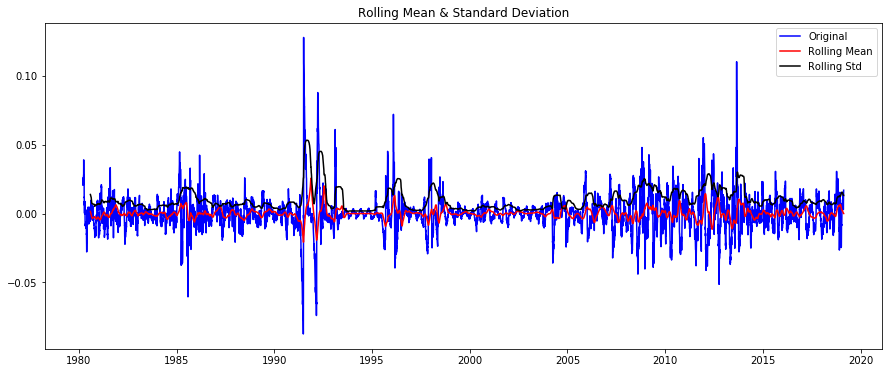

Results of Dickey-Fuller Test:
Test Statistic                -1.875931e+01
p-value                        2.026554e-30
#Lags Used                     3.500000e+01
Number of Observations Used    1.004700e+04
Critical Value (1%)           -3.431001e+00
Critical Value (5%)           -2.861828e+00
Critical Value (10%)          -2.566923e+00
dtype: float64


In [191]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [5]:
from statsmodels.tsa.stattools import acf, pacf

In [201]:
lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

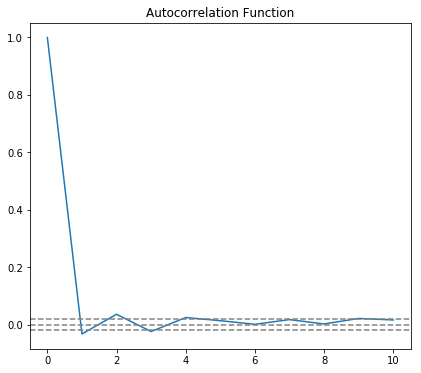

In [202]:
#Plot ACF:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

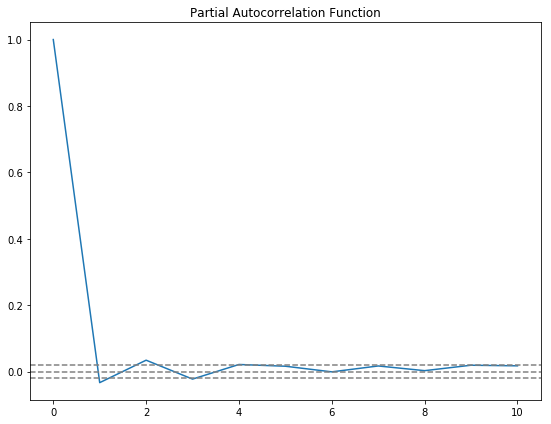

In [203]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [6]:
from statsmodels.tsa.arima_model import ARIMA

## AR MODEL 

C:\Users\Vivek\Anaconda3\envs\tf_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Vivek\Anaconda3\envs\tf_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.1954')

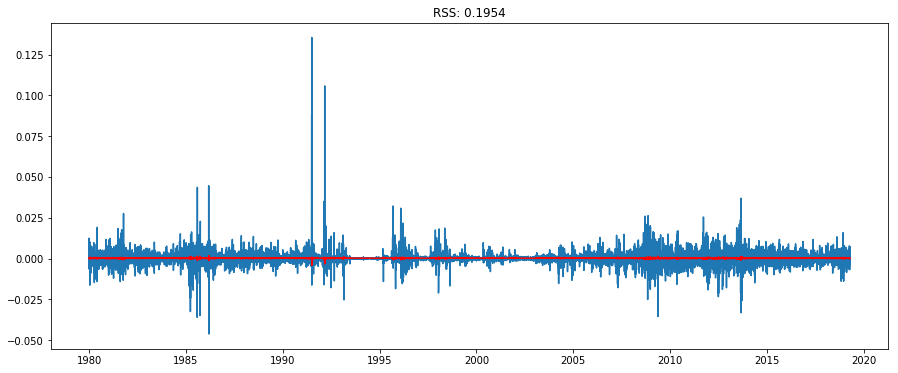

In [198]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

## MA Model

C:\Users\Vivek\Anaconda3\envs\tf_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Vivek\Anaconda3\envs\tf_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.1954')

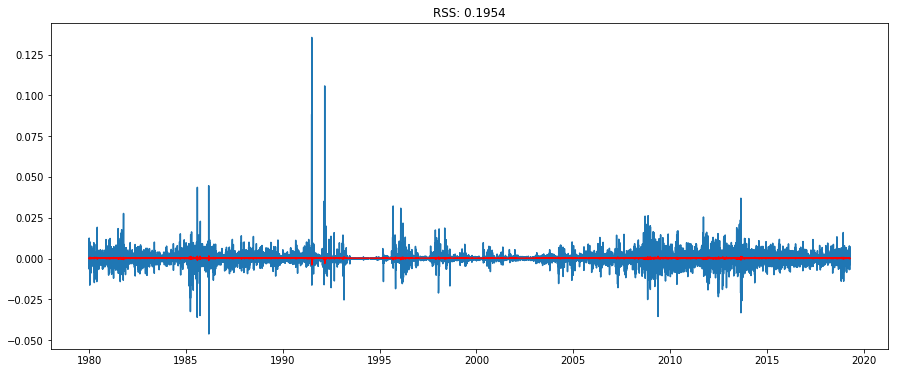

In [204]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

## ARIMA Model

C:\Users\Vivek\Anaconda3\envs\tf_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Vivek\Anaconda3\envs\tf_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.1949')

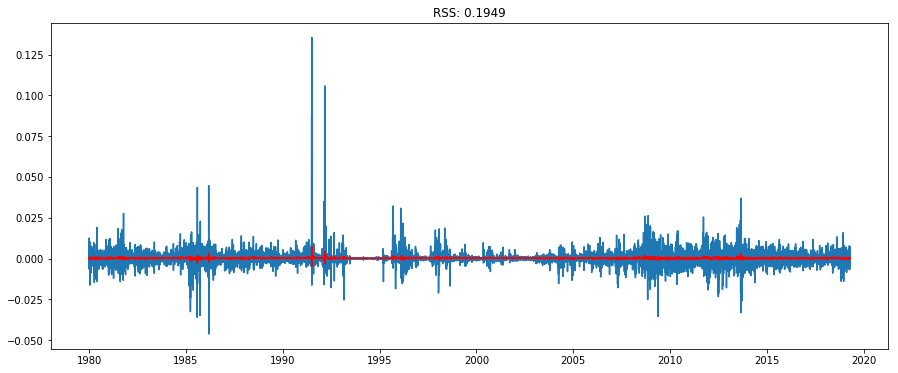

In [253]:
model = ARIMA(ts_log, order=(3, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [254]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head(10))

Date
1980-01-03    0.000212
1980-01-04    0.000426
1980-01-07   -0.000439
1980-01-08    0.000766
1980-01-09    0.000013
1980-01-10    0.000583
1980-01-11   -0.000054
1980-01-14    0.000217
1980-01-15    0.000283
1980-01-16    0.000718
dtype: float64


In [255]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head(10))

Date
1980-01-03    0.000212
1980-01-04    0.000638
1980-01-07    0.000199
1980-01-08    0.000964
1980-01-09    0.000977
1980-01-10    0.001560
1980-01-11    0.001507
1980-01-14    0.001724
1980-01-15    0.002007
1980-01-16    0.002725
dtype: float64


In [256]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head(10)

Date
1980-01-02    2.079442
1980-01-03    2.079654
1980-01-04    2.080080
1980-01-07    2.079640
1980-01-08    2.080406
1980-01-09    2.080419
1980-01-10    2.081002
1980-01-11    2.080948
1980-01-14    2.081165
1980-01-15    2.081448
dtype: float64

Text(0.5, 1.0, 'RMSE: 9.7807')

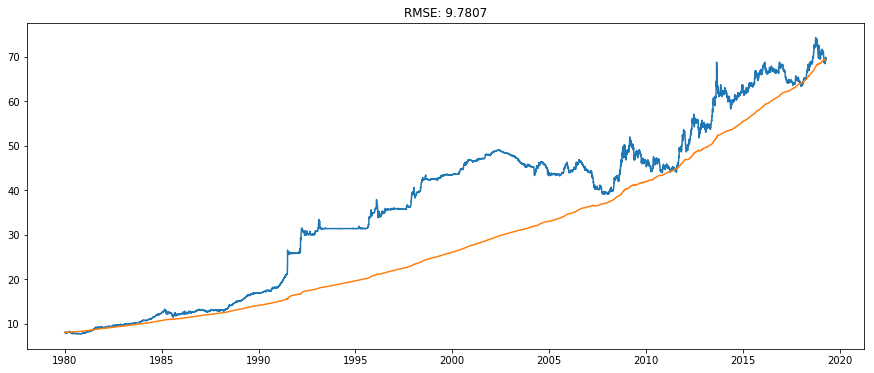

In [274]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [9]:
#read time series from the exchange.csv file 
exchangeRatesSeries = pd.read_csv('USD_INR.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
exchangeRatesSeries.head(10)

,Price,Open,High,Low,Change %
Date,,,,,
1980-01-02,8.00,8.00,8.00,8.00,0
1980-01-03,7.95,7.95,7.95,7.95,-0.63
1980-01-04,8.05,8.05,8.05,8.05,1.26
1980-01-07,8.05,8.05,8.05,8.05,0
1980-01-08,8.05,8.05,8.05,8.05,0
1980-01-09,8.00,8.00,8.00,8.00,-0.62
1980-01-10,8.00,8.00,8.00,8.00,0
1980-01-11,8.03,8.03,8.03,8.03,0.37
1980-01-14,8.03,8.03,8.03,8.03,0


In [327]:
exchangeRatesSeries.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Change %     object
dtype: object

In [10]:
exchangeRatesSeries = exchangeRatesSeries['Price']
exchangeRatesSeries.head(10)

Date
1980-01-02    8.00
1980-01-03    7.95
1980-01-04    8.05
1980-01-07    8.05
1980-01-08    8.05
1980-01-09    8.00
1980-01-10    8.00
1980-01-11    8.03
1980-01-14    8.03
1980-01-15    7.90
Name: Price, dtype: float64

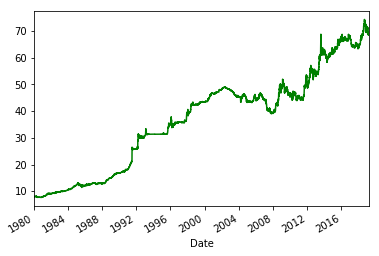

In [11]:
exchangeRatesSeries.plot(color='green')

In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [12]:
#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [13]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [288]:
ActualData = pd.read_csv('USD_INR.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
ActualData = ActualData['Price']

In [289]:
NumberOfElements = len(ActualData)

In [290]:
#Use 90% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.9)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

In [312]:
#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()

#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
    ActualValue =  TestData[timepoint]
    #forecast value
    Prediction = StartARIMAForecasting(Actual, 3,1,1)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

Actual=63.799000, Predicted=64.192757
Actual=63.821000, Predicted=63.794381
Actual=64.138000, Predicted=63.839716
Actual=63.988000, Predicted=64.161473
Actual=64.177000, Predicted=63.975085
Actual=63.798000, Predicted=64.184032
Actual=63.692000, Predicted=63.799717
Actual=63.722000, Predicted=63.701823
Actual=63.739000, Predicted=63.747327
Actual=63.773000, Predicted=63.742214
Actual=64.332000, Predicted=63.779164
Actual=64.855000, Predicted=64.344680
Actual=65.203000, Predicted=64.848709
Actual=65.129000, Predicted=65.180137
Actual=65.436000, Predicted=65.112463
Actual=65.454000, Predicted=65.443096
Actual=65.109000, Predicted=65.455017
Actual=65.433000, Predicted=65.098327
Actual=66.034000, Predicted=65.460224
Actual=66.814000, Predicted=66.047525
Actual=66.280000, Predicted=66.800330
Actual=66.004000, Predicted=66.236145
Actual=65.968000, Predicted=66.006063
Actual=66.150000, Predicted=66.008353
Actual=66.412000, Predicted=66.160619
Actual=66.383000, Predicted=66.417633
Actual=66.20

Actual=67.273000, Predicted=67.643310
Actual=66.927000, Predicted=67.263853
Actual=67.031000, Predicted=66.935388
Actual=67.171000, Predicted=67.066979
Actual=67.209000, Predicted=67.181184
Actual=67.434000, Predicted=67.205172
Actual=67.268000, Predicted=67.440625
Actual=67.000000, Predicted=67.262602
Actual=66.790000, Predicted=67.001694
Actual=66.658000, Predicted=66.811789
Actual=66.500000, Predicted=66.675894
Actual=66.753000, Predicted=66.513562
Actual=66.952000, Predicted=66.772483
Actual=67.187000, Predicted=66.955998
Actual=67.292000, Predicted=67.180065
Actual=67.079000, Predicted=67.288686
Actual=67.315000, Predicted=67.071197
Actual=67.074000, Predicted=67.333329
Actual=67.551000, Predicted=67.074274
Actual=67.624000, Predicted=67.564443
Actual=67.449000, Predicted=67.625099
Actual=67.279000, Predicted=67.429970
Actual=67.885000, Predicted=67.295226
Actual=67.914000, Predicted=67.911586
Actual=67.715000, Predicted=67.901242
Actual=67.422000, Predicted=67.695963
Actual=67.50

Actual=65.455000, Predicted=65.469503
Actual=65.425000, Predicted=65.454376
Actual=64.995000, Predicted=65.428335
Actual=65.045000, Predicted=64.995966
Actual=64.875000, Predicted=65.069423
Actual=64.860000, Predicted=64.889455
Actual=64.860000, Predicted=64.865687


C:\Users\Vivek\Anaconda3\envs\tf_gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=64.985000, Predicted=64.874791
Actual=65.080000, Predicted=64.990533
Actual=64.875000, Predicted=65.084100
Actual=64.606000, Predicted=64.869661
Actual=64.270000, Predicted=64.614306
Actual=64.605000, Predicted=64.287506
Actual=64.555000, Predicted=64.635703
Actual=64.690000, Predicted=64.555503
Actual=64.445000, Predicted=64.686530
Actual=64.480000, Predicted=64.448965
Actual=64.480000, Predicted=64.489022
Actual=64.605000, Predicted=64.495468
Actual=64.665000, Predicted=64.607833
Actual=64.620000, Predicted=64.669509
Actual=64.650000, Predicted=64.618206
Actual=64.490000, Predicted=64.658436
Actual=64.330000, Predicted=64.493695
Actual=64.130000, Predicted=64.338063
Actual=64.115000, Predicted=64.144557
Actual=64.290000, Predicted=64.131358
Actual=64.255000, Predicted=64.304947
Actual=64.165000, Predicted=64.252116
Actual=64.165000, Predicted=64.165974
Actual=64.215000, Predicted=64.177672
Actual=64.315000, Predicted=64.223591
Actual=64.360000, Predicted=64.320230
Actual=64.68

Actual=63.690000, Predicted=63.607261
Actual=63.550000, Predicted=63.692920
Actual=63.980000, Predicted=63.551543
Actual=64.130000, Predicted=63.994751
Actual=64.140000, Predicted=64.127273
Actual=64.230000, Predicted=64.124485
Actual=64.280000, Predicted=64.238908
Actual=64.300000, Predicted=64.282157
Actual=64.375000, Predicted=64.302024
Actual=64.280000, Predicted=64.380823
Actual=64.265000, Predicted=64.281177
Actual=64.100000, Predicted=64.272293
Actual=63.900000, Predicted=64.107786
Actual=64.215000, Predicted=63.908050
Actual=64.250000, Predicted=64.239328
Actual=64.860000, Predicted=64.248050
Actual=64.805000, Predicted=64.862870
Actual=64.975000, Predicted=64.790321
Actual=64.710000, Predicted=64.965184
Actual=64.770000, Predicted=64.715874
Actual=64.920000, Predicted=64.777288
Actual=65.210000, Predicted=64.938477
Actual=65.230000, Predicted=65.207743
Actual=65.220000, Predicted=65.223493
Actual=65.025000, Predicted=65.216637
Actual=64.905000, Predicted=65.031303
Actual=64.88

Actual=73.461000, Predicted=73.480252
Actual=73.400000, Predicted=73.454902
Actual=73.680000, Predicted=73.400451
Actual=73.960000, Predicted=73.695865
Actual=73.455000, Predicted=73.961742
Actual=72.440000, Predicted=73.434116
Actual=72.915000, Predicted=72.443898
Actual=73.080000, Predicted=72.987778
Actual=72.955000, Predicted=73.094787
Actual=72.450000, Predicted=72.927301
Actual=72.380000, Predicted=72.460262
Actual=72.480000, Predicted=72.407180
Actual=72.480000, Predicted=72.507188
Actual=72.860000, Predicted=72.477819
Actual=72.615000, Predicted=72.871719
Actual=72.310000, Predicted=72.603029
Actual=71.915000, Predicted=72.309162
Actual=71.980000, Predicted=71.941254
Actual=71.785000, Predicted=72.007796
Actual=71.610000, Predicted=71.797127
Actual=71.430000, Predicted=71.614486
Actual=71.305000, Predicted=71.450225
Actual=70.690000, Predicted=71.318227
Actual=70.655000, Predicted=70.696280
Actual=70.675000, Predicted=70.687019
Actual=70.820000, Predicted=70.702534
Actual=70.78

Test Mean Squared Error (smaller the better fit): 0.049


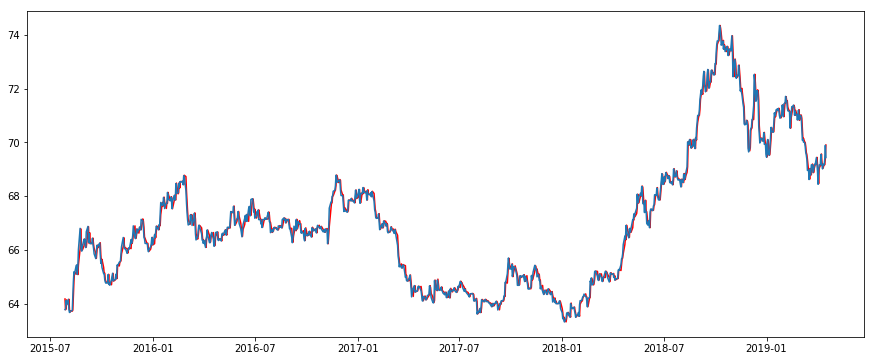

In [313]:
#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
Predictions = pd.Series(Predictions)
Predictions.index = TestData.index
# plot
plt.plot(Predictions, color='red')
plt.plot(TestData)
plt.show()

In [14]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [16]:
y = exchangeRatesSeries

Date
1980-01-02     8.000
1980-01-03     7.950
1980-01-04     8.050
1980-01-07     8.050
1980-01-08     8.050
1980-01-09     8.000
1980-01-10     8.000
1980-01-11     8.030
1980-01-14     8.030
1980-01-15     7.900
1980-01-16     7.900
1980-01-17     7.960
1980-01-18     7.850
1980-01-21     7.930
1980-01-22     7.980
1980-01-23     8.000
1980-01-24     8.000
1980-01-25     8.000
1980-01-28     8.000
1980-01-29     8.000
1980-01-30     8.000
1980-01-31     8.060
1980-02-01     8.040
1980-02-04     8.040
1980-02-05     8.000
1980-02-06     7.960
1980-02-07     7.920
1980-02-08     7.850
1980-02-11     7.900
1980-02-13     7.900
               ...  
2019-03-14    69.365
2019-03-15    68.963
2019-03-17    68.963
2019-03-18    68.625
2019-03-19    69.015
2019-03-20    68.790
2019-03-21    68.810
2019-03-22    69.170
2019-03-24    69.171
2019-03-25    68.890
2019-03-26    68.996
2019-03-27    69.100
2019-03-28    69.190
2019-03-29    69.185
2019-03-31    69.440
2019-04-01    69.205
2019-04-

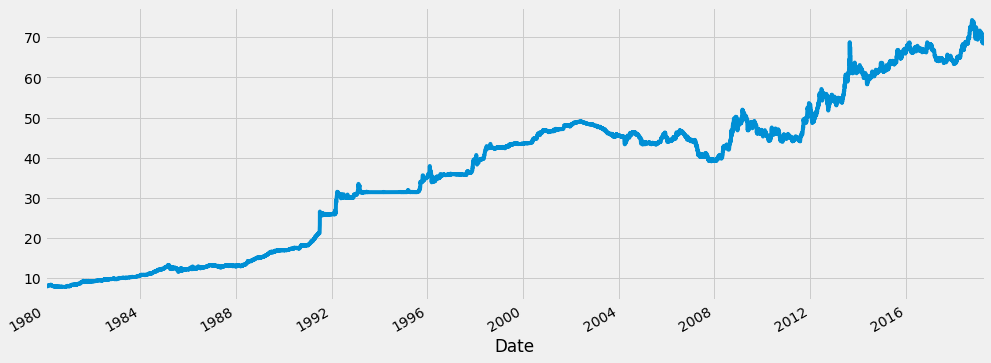

In [26]:
print(y)
y.plot(figsize=(15, 6))
plt.show()

In [27]:
y.index

DatetimeIndex(['1980-01-02', '1980-01-03', '1980-01-04', '1980-01-07',
               '1980-01-08', '1980-01-09', '1980-01-10', '1980-01-11',
               '1980-01-14', '1980-01-15',
               ...
               '2019-04-07', '2019-04-08', '2019-04-09', '2019-04-10',
               '2019-04-11', '2019-04-12', '2019-04-14', '2019-04-15',
               '2019-04-16', '2019-04-17'],
              dtype='datetime64[ns]', name='Date', length=10183, freq=None)

In [65]:
# Define the p, d and q parameters to take any value between 1 and 3
p = d = q = range(1, 3)


In [66]:
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))


In [67]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [68]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (1, 1, 2) x (1, 1, 2, 12)
SARIMAX: (1, 1, 2) x (1, 2, 1, 12)
SARIMAX: (1, 2, 1) x (1, 2, 2, 12)
SARIMAX: (1, 2, 1) x (2, 1, 1, 12)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-6634.598556832433
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:-6616.493106041198
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:-2425.7442386511357
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:-6399.21927668401
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:-6615.26473915052
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:-6610.316917368784
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:-3601.1742897679524
ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:-6353.5464176069445
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:-6644.065876103474
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:-6626.226758773717
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:-2443.556099755354
ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:-5841.457395502139
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:-6619.451257911212
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:-6620.466321577282
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:-3614.169107133797
ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:-6427.382593642331
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:-6611.483289514113
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:-6594.3491

In [ ]:
#ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:-6644.065876103474

In [21]:
## Fitting ARIMA Model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 2),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\Vivek\Anaconda3\envs\tf_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2306      0.116      1.982      0.047       0.003       0.459
ma.L1         -0.2100      0.116     -1.803      0.071      -0.438       0.018
ma.L2         -0.0416      0.004    -11.260      0.000      -0.049      -0.034
ar.S.L12   -4.047e-06      0.005     -0.001      0.999      -0.011       0.011
ma.S.L12      -1.0000      0.070    -14.388      0.000      -1.136      -0.864
sigma2         0.0302      0.002     14.284      0.000       0.026       0.034


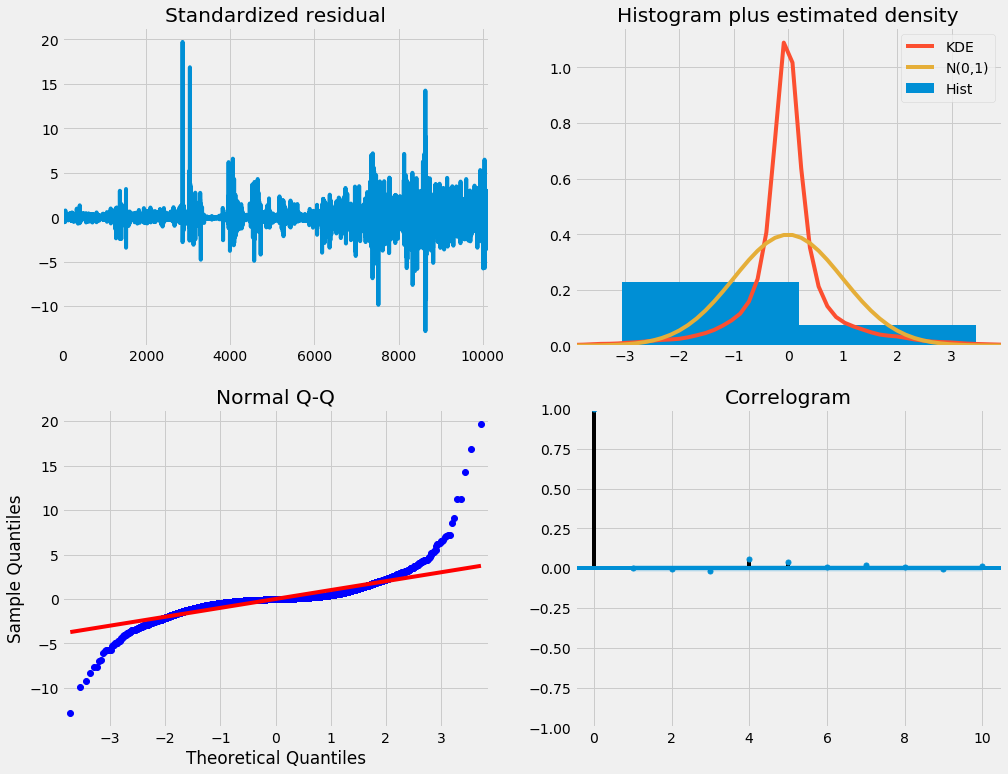

In [22]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [30]:
pred = results.get_prediction(start=10000, dynamic=False)
pred_ci = pred.conf_int()

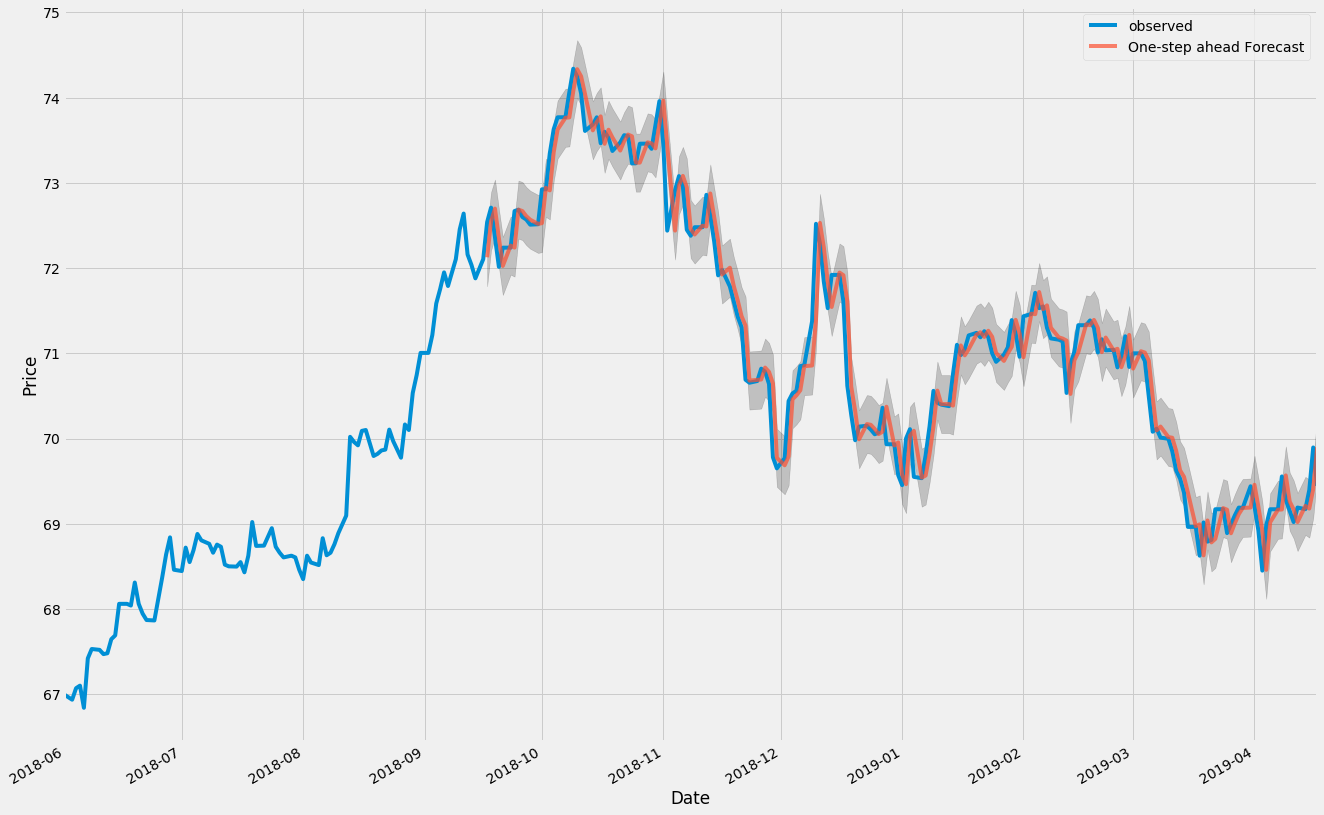

In [46]:

ax = y['2018-06-01':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.plot(figsize = (15,12))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [34]:
y_forecasted = pred.predicted_mean
y_truth = y[10000:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.08


In [42]:
pred_dynamic = results.get_prediction(start=10000, dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

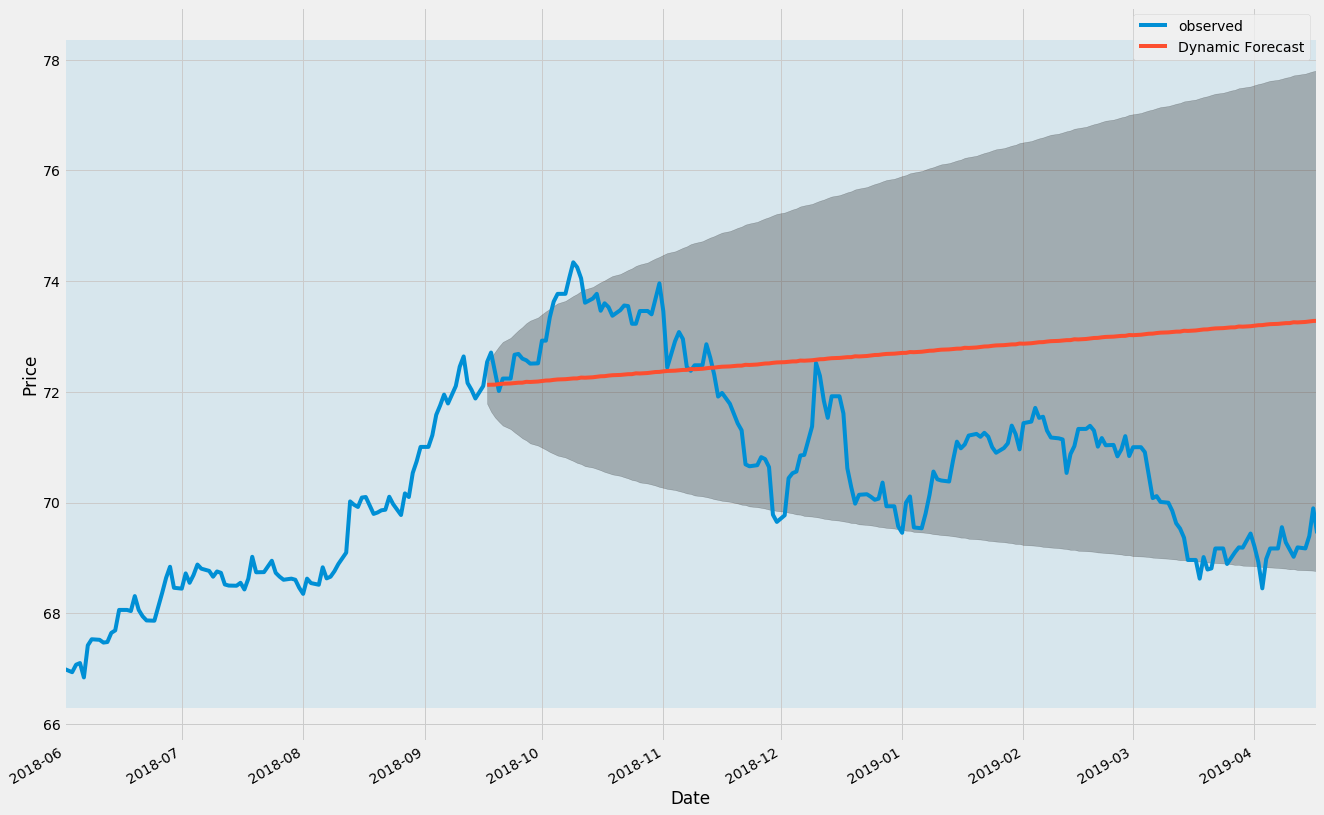

In [49]:
ax = y['2018-06-01':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-06-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [52]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2018-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5.47
